In [14]:
import sys
import os
import matplotlib.pyplot as plt

import numpy as np

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
import scripts.dicom as dicom

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
path = os.path.abspath(os.path.join(os.getcwd(), "..", "data", "1685", "10_AP_Ax2.50mm"))
# path = os.path.abspath(os.path.join(os.getcwd(), "..", "data", "1685", "40_RTRD_Ax2.50mm"))

print(f"Loading DICOM files from {path}")
slices = dicom.load_dicom(path)

print(f"Number of slices: {len(slices)}")

Loading DICOM files from /Users/josep/Documents/master/11763-Medical-Image-Processing-Final-Project/data/1685/10_AP_Ax2.50mm
Number of slices: 86


In [17]:
print (f"First slice: {slices[0]}")

First slice: Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113704.1.111.3956.1410855854.4865
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4-JP'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELIX']
(0008, 0012) Instance Creation Date              DA: ''
(0008, 0013) Instance Creation Time              TM: '102414'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0017) Acquisition UID   

In [18]:
ds = slices[0]
print("PixelSpacing:", ds.get("PixelSpacing"))
print("SliceThickness:", ds.get("SliceThickness"))
print("SpacingBetweenSlices:", ds.get("SpacingBetweenSlices"))

PixelSpacing: [0.767578, 0.767578]
SliceThickness: 5.00
SpacingBetweenSlices: 2.5


In [19]:
for i in range(len(slices)):
    print(f"Slice {i}: {slices[i].InstanceNumber}")

Slice 0: 1
Slice 1: 2
Slice 2: 3
Slice 3: 4
Slice 4: 5
Slice 5: 6
Slice 6: 7
Slice 7: 8
Slice 8: 9
Slice 9: 10
Slice 10: 11
Slice 11: 12
Slice 12: 13
Slice 13: 14
Slice 14: 15
Slice 15: 16
Slice 16: 17
Slice 17: 18
Slice 18: 19
Slice 19: 20
Slice 20: 21
Slice 21: 22
Slice 22: 23
Slice 23: 24
Slice 24: 25
Slice 25: 26
Slice 26: 27
Slice 27: 28
Slice 28: 29
Slice 29: 30
Slice 30: 31
Slice 31: 32
Slice 32: 33
Slice 33: 34
Slice 34: 35
Slice 35: 36
Slice 36: 37
Slice 37: 38
Slice 38: 39
Slice 39: 40
Slice 40: 41
Slice 41: 42
Slice 42: 43
Slice 43: 44
Slice 44: 45
Slice 45: 46
Slice 46: 47
Slice 47: 48
Slice 48: 49
Slice 49: 50
Slice 50: 51
Slice 51: 52
Slice 52: 53
Slice 53: 54
Slice 54: 55
Slice 55: 56
Slice 56: 57
Slice 57: 58
Slice 58: 59
Slice 59: 60
Slice 60: 61
Slice 61: 62
Slice 62: 63
Slice 63: 64
Slice 64: 65
Slice 65: 66
Slice 66: 67
Slice 67: 68
Slice 68: 69
Slice 69: 70
Slice 70: 71
Slice 71: 72
Slice 72: 73
Slice 73: 74
Slice 74: 75
Slice 75: 76
Slice 76: 77
Slice 77: 78
Slice

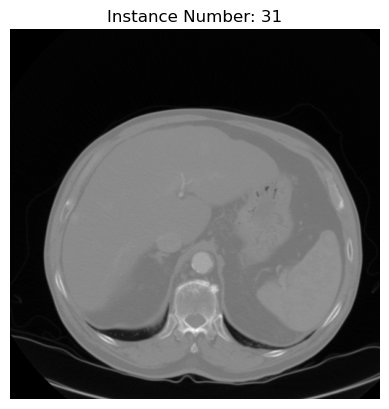

Slice 30 pixel array shape: (512, 512)


In [20]:
index = 30
plt.imshow(slices[index].pixel_array, cmap='gray')
plt.title(f"Instance Number: {slices[index].InstanceNumber}")
plt.axis('off')
plt.show()

print(f"Slice {index} pixel array shape: {slices[index].pixel_array.shape}")

# Transform it to 3d

In [21]:
img_dcm = dicom.create_3d_array_from_dicom(slices)
# img_dcm = np.flip(img_dcm, axis=0)  # Change orientation (better visualization)

print(f"3D image shape: {img_dcm.shape}")

3D image shape: (86, 512, 512)


In [22]:
# Obtain the pixel spacing, we will use the index 0, as all slices have the same spacing
pixel_spacing = slices[0].get("PixelSpacing")
print(f"Pixel spacing: {pixel_spacing}")

slice_spacing = slices[0].get("SpacingBetweenSlices")
print(f"Slice spacing: {slice_spacing}")


Pixel spacing: [0.767578, 0.767578]
Slice spacing: 2.5


### Median planes

Median Sagittal Plane shape: (86, 512)
Median Coronal Plane shape: (86, 512)


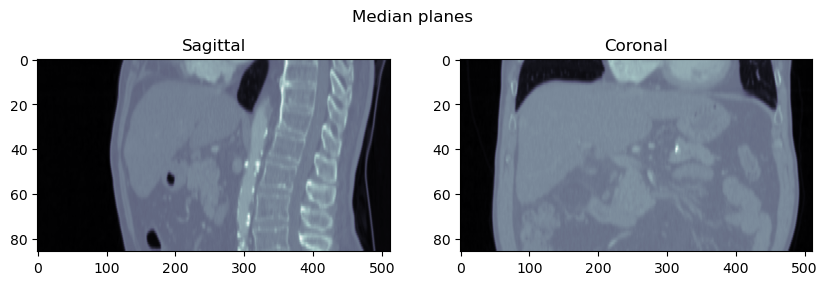

In [ ]:
# Obtenir el plane sagital i coronal
sagittal_plane = dicom.median_sagittal_plane(img_dcm)
coronal_plane = dicom.median_coronal_plane(img_dcm)

print(f"Median Sagittal Plane shape: {sagittal_plane.shape}")
print(f"Median Coronal Plane shape: {coronal_plane.shape}")

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].imshow(sagittal_plane, cmap='bone', aspect=slice_spacing / pixel_spacing[0])
ax[0].set_title('Sagittal')
ax[1].imshow(coronal_plane, cmap='bone', aspect=slice_spacing / pixel_spacing[1])
ax[1].set_title('Coronal')
fig.suptitle('Median planes')
plt.show()


### Sagital

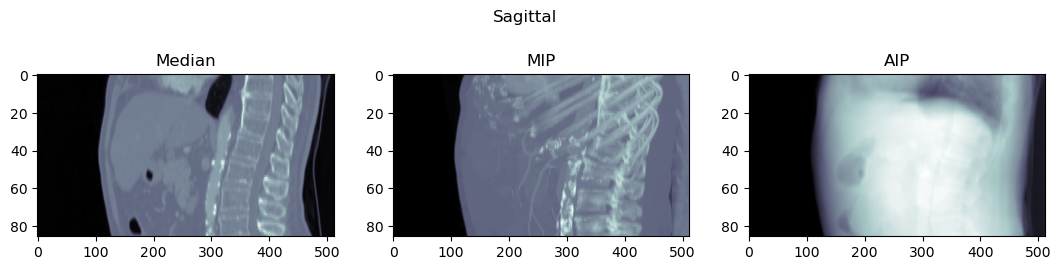

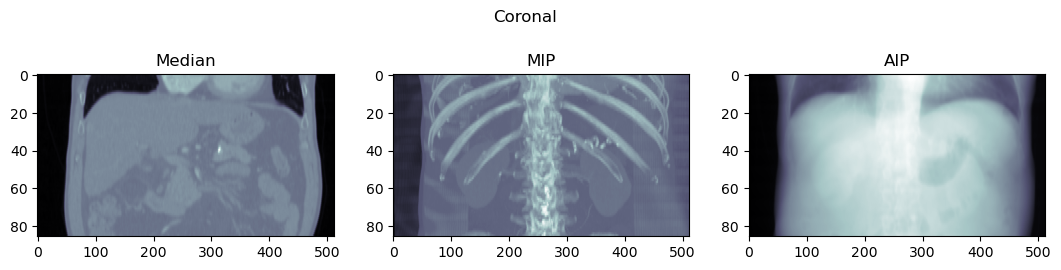

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(13, 3))
ax[0].imshow(dicom.median_sagittal_plane(img_dcm), cmap='bone', aspect=slice_spacing / pixel_spacing[0])
ax[0].set_title('Median')
ax[1].imshow(dicom.MIP_sagittal_plane(img_dcm), cmap='bone', aspect=slice_spacing / pixel_spacing[0])
ax[1].set_title('MIP')
ax[2].imshow(dicom.AIP_sagittal_plane(img_dcm), cmap='bone', aspect=slice_spacing / pixel_spacing[0])
ax[2].set_title('AIP')
fig.suptitle('Sagittal')
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(13, 3))
ax[0].imshow(dicom.median_coronal_plane(img_dcm), cmap='bone', aspect=slice_spacing / pixel_spacing[1])
ax[0].set_title('Median')
ax[1].imshow(dicom.MIP_coronal_plane(img_dcm), cmap='bone', aspect=slice_spacing / pixel_spacing[1])
ax[1].set_title('MIP')
ax[2].imshow(dicom.AIP_coronal_plane(img_dcm), cmap='bone', aspect=slice_spacing / pixel_spacing[1])
ax[2].set_title('AIP')
fig.suptitle('Coronal')
plt.show()

# Load tumor

In [ ]:
from highdicom.seg import Segmentation
import highdicom as hd


In [26]:
tumor_path = os.path.abspath(os.path.join(os.getcwd(), "..", "data", "1685", "10_AP_Ax2.50mm_ManualROI_Tumor.dcm"))
# path = os.path.abspath(os.path.join(os.getcwd(), "..", "data", "1685", "40_RTRD_Ax2.50mm"))

seg = hd.seg.segread(tumor_path)

assert isinstance(seg, hd.seg.Segmentation)

print(seg)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 212
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Segmentation Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.10.511.3.90273331088182543950991572446921528
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.9.7433.1.1
(0002, 0013) Implementation Version Name         SH: 'highdicom0.22.0'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: Segmentation Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.10.511.3.90273331088182543950991572446921528
(0008, 0020) Study Date                          DA: ''
(0008, 0023) Content Date   

In [27]:
print(seg.number_of_segments)
print(f"Segmentation shape: {seg.pixel_array.shape}")

segment_description = seg.get_segment_description(1)
assert isinstance(segment_description, hd.seg.SegmentDescription)
print(segment_description)

1
Segmentation shape: (24, 512, 512)
(0062, 0003)  Segmented Property Category Code Sequence  1 item(s) ---- 
   (0008, 0100) Code Value                          SH: '49755003'
   (0008, 0102) Coding Scheme Designator            SH: 'SCT'
   (0008, 0104) Code Meaning                        LO: 'Morphologically Abnormal Structure'
   ---------
(0062, 0004) Segment Number                      US: 1
(0062, 0005) Segment Label                       LO: 'Tumor'
(0062, 0008) Segment Algorithm Type              CS: 'MANUAL'
(0062, 000d) Recommended Display CIELab Value    US: [34886, 53484, 50172]
(0062, 000f)  Segmented Property Type Code Sequence  1 item(s) ---- 
   (0008, 0100) Code Value                          SH: '108369006'
   (0008, 0102) Coding Scheme Designator            SH: 'SCT'
   (0008, 0104) Code Meaning                        LO: 'tumor'
   ---------


In [28]:
mask = seg.pixel_array
print(f"Mask shape: {mask.shape}")

Mask shape: (24, 512, 512)


In [29]:
for i, frame in enumerate(seg.PerFrameFunctionalGroupsSequence):
    position = frame.PlanePositionSequence[0].ImagePositionPatient
    print(f"Slice {i} position: {position}")


Slice 0 position: [-215.5, -110.5, 816]
Slice 1 position: [-215.5, -110.5, 818.5]
Slice 2 position: [-215.5, -110.5, 821]
Slice 3 position: [-215.5, -110.5, 823.5]
Slice 4 position: [-215.5, -110.5, 826]
Slice 5 position: [-215.5, -110.5, 828.5]
Slice 6 position: [-215.5, -110.5, 831]
Slice 7 position: [-215.5, -110.5, 833.5]
Slice 8 position: [-215.5, -110.5, 836]
Slice 9 position: [-215.5, -110.5, 838.5]
Slice 10 position: [-215.5, -110.5, 846]
Slice 11 position: [-215.5, -110.5, 848.5]
Slice 12 position: [-215.5, -110.5, 851]
Slice 13 position: [-215.5, -110.5, 853.5]
Slice 14 position: [-215.5, -110.5, 856]
Slice 15 position: [-215.5, -110.5, 858.5]
Slice 16 position: [-215.5, -110.5, 861]
Slice 17 position: [-215.5, -110.5, 863.5]
Slice 18 position: [-215.5, -110.5, 898.5]
Slice 19 position: [-215.5, -110.5, 901]
Slice 20 position: [-215.5, -110.5, 903.5]
Slice 21 position: [-215.5, -110.5, 906]
Slice 22 position: [-215.5, -110.5, 908.5]
Slice 23 position: [-215.5, -110.5, 911]


CT Z positions: [976.0, 973.5, 971.0, 968.5, 966.0, 963.5, 961.0, 958.5, 956.0, 953.5, 951.0, 948.5, 946.0, 943.5, 941.0, 938.5, 936.0, 933.5, 931.0, 928.5, 926.0, 923.5, 921.0, 918.5, 916.0, 913.5, 911.0, 908.5, 906.0, 903.5, 901.0, 898.5, 896.0, 893.5, 891.0, 888.5, 886.0, 883.5, 881.0, 878.5, 876.0, 873.5, 871.0, 868.5, 866.0, 863.5, 861.0, 858.5, 856.0, 853.5, 851.0, 848.5, 846.0, 843.5, 841.0, 838.5, 836.0, 833.5, 831.0, 828.5, 826.0, 823.5, 821.0, 818.5, 816.0, 813.5, 811.0, 808.5, 806.0, 803.5, 801.0, 798.5, 796.0, 793.5, 791.0, 788.5, 786.0, 783.5, 781.0, 778.5, 776.0, 773.5, 771.0, 768.5, 766.0, 763.5]
Tumor Z positions: [816.0, 818.5, 821.0, 823.5, 826.0, 828.5, 831.0, 833.5, 836.0, 838.5, 846.0, 848.5, 851.0, 853.5, 856.0, 858.5, 861.0, 863.5, 898.5, 901.0, 903.5, 906.0, 908.5, 911.0]
Slice 0 position: 64
Slice 1 position: 63
Slice 2 position: 62
Slice 3 position: 61
Slice 4 position: 60
Slice 5 position: 59
Slice 6 position: 58
Slice 7 position: 57
Slice 8 position: 56
Slic

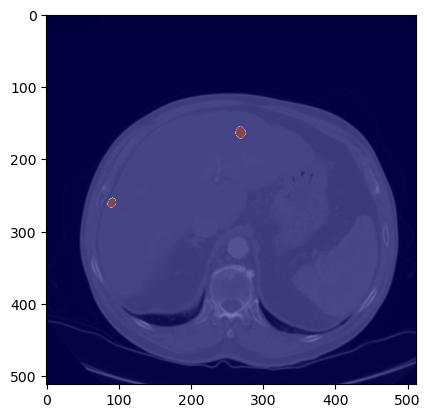

In [30]:
import numpy as np

# 1. Obtain the Z positions of each slice of the original volume (CT)
ct_z_positions = [float(slice.ImagePositionPatient[2]) for slice in slices]

# 2. Obtain the Z positions of each slice of the tumor
tumor_z_positions = [
    float(frame.PlanePositionSequence[0].ImagePositionPatient[2])
    for frame in seg.PerFrameFunctionalGroupsSequence
]

print(f"CT Z positions: {ct_z_positions}")
print(f"Tumor Z positions: {tumor_z_positions}")

# 3. Mapping the tumor slice indices to the original volume
tumor_slice_indices = [ct_z_positions.index(z) for z in tumor_z_positions]

# 4. Creathe the empty mask
full_mask = np.zeros_like(img_dcm, dtype=np.uint8)

# 5. Assign each slice of the tumor to its position
for i, idx in enumerate(tumor_slice_indices):
    print(f"Slice {i} position: {idx}")
    full_mask[idx] = mask[i]

index = 30
plt.imshow(img_dcm[index], cmap='gray')
plt.imshow(full_mask[index], alpha=0.5, cmap='jet')
plt.show()


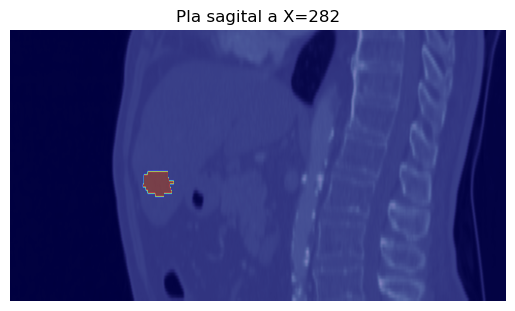

In [31]:
sagital_sum = full_mask.sum(axis=(0,1))  # Shape: (X,)
max_index = np.argmax(sagital_sum)

# plane = img_dcm[:, :, max_index]
plane = dicom.median_sagittal_plane(img_dcm)
mask_plane = full_mask[:, :, max_index]

plt.imshow(plane, cmap="bone", aspect=slice_spacing / pixel_spacing[0])
plt.imshow(mask_plane, cmap="jet", alpha=0.5, aspect=slice_spacing / pixel_spacing[0])
plt.title(f"Pla sagital a X={max_index}")
plt.axis("off")
plt.show()

# GIF

In [ ]:
import scipy

def rotate_on_axial_plane(img_dcm: np.ndarray, angle_in_degrees: float) -> np.ndarray:
    """ Rotate the image on the axial plane. """
    return scipy.ndimage.rotate(img_dcm, angle_in_degrees, axes=(1, 2), reshape=False)

img_min = np.amin(img_dcm)
img_max = np.amax(img_dcm)
cm = 'bone'

output_dir = '../outputs/projection/'
os.makedirs(output_dir, exist_ok=True)

n = 16

for idx, alpha in enumerate(np.linspace(0, 360*(n-1)/n, num=n)):
    # Rotatem the image and the mask
    rotated_img = rotate_on_axial_plane(img_dcm, alpha)
    rotated_mask = rotate_on_axial_plane(full_mask, alpha)

    # Create the MIP projection
    projection = dicom.MIP_sagittal_plane(rotated_img)
    projection_mask = dicom.MIP_sagittal_plane(rotated_mask)
    # No mather if we do MIP_sagittal_plane or MIP_coronal_plane, the result is the same
    
    # MIP the mask
    sagittal_mask = rotated_mask.max(axis=2) 

    fig, ax = plt.subplots()
    ax.imshow(projection, cmap=cm, vmin=img_min, vmax=img_max, aspect=slice_spacing / pixel_spacing[0])
    ax.imshow(projection_mask, cmap="jet", alpha=0.5, aspect=slice_spacing / pixel_spacing[0])
    ax.axis("off")
    fig.savefig(os.path.join(output_dir, f'Projection_{idx}.png'), bbox_inches='tight', pad_inches=0)
    plt.close(fig)


In [38]:
from PIL import Image

# Route
image_folder = '../outputs/projection/'
output_gif = '../outputs/projection/Animation.gif'

# Sort the image files by their index
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.png')],
                     key=lambda x: int(x.split('_')[-1].split('.')[0]))

# Load images
images = [Image.open(os.path.join(image_folder, f)) for f in image_files]

# Save as GIF
images[0].save(
    output_gif,
    save_all=True,
    append_images=images[1:],
    duration=250,
    loop=0
)